## Exercises

In [1]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data

### For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

#### 1. Has the network latency gone up since we switched internet service providers?
- ISP 1 vs ISP 2 (discrete, boolean, isp_switch)
- Network latency (continuous, net_latency)
- Comparison of means of two groups (t-test)

H{0} : latency (mean a) is less than or equal latency b(mean)

H{a}: latency (mean a) is greater than latency (mean b)

True Positive: Reject H{0} when H{0} is false (latency went up and we said it did)

True Negative: Accept H{0} when H{0} is true (fail to reject H{0} (latency didnt go up and we said it didnt)

Type 1 error: Latency did not go up with ISP switch, but we said it did

Type 2 error: Latency did go up with ISP switch, but we said it didnt

#### 2. Is the website redesign any good?

- Question: Are we getting more traffic on the website since the website redesign?
- Variables: Website redesign (web_redesign),discrete, boolean ('True' or 'False) AND web traffic hits (traffic_rate), continuous variable
- H{0}: There is no difference in website traffic since the website redesign
- H{a}: There is a significant difference in website trafic since the redesign

True Positive: Reject H{0} when H{0} is false (Traffic is greater than before and after website redesign and we said it would be greater)

True Negative: Accept H{0} when H{0} is true (fail to reject H{0}) (Traffic is less than or equal to the rate when website was redesigned, and we said it would be less than or equal)

Type 1 Error: There is no significant increase in website traffic since the redesign, but we conclude that there is a significant increase in website traffic with website redesign (we reject the null)

Type 2 Error: There is a significant increase in website traffic since the redesign, but we conclude that the traffic level is less than or the same as before (we accept the null)




#### 3.  Is our television ad driving more sales?
Question: Did the television add increase sales for the company?

Variables: TV_ad (discrete/categorical), boolean (True, False); Sales figures ('sales'), continuous variable

H{0}: The introduction of a TV add had no significant impact on sales (sales2 <= sales 1)
H{a}: The introduction of a TV add had a significant impact on sales (sales 2 > sales 1)

True Positive: Reject H{0} when H{0} is false (The TV add drove more sales, and we said the TV add drove more sales)

True Negative: Accept H{0} when H{0} is true (The TV add did not drive more sales, and we agreed with (H0) that there was no signficant increase in sales with the new TV add)

Type 1 error: There was no increase in sales with the new TV ad, but we conclude there is a significant increase in sales from the TV ad (we rejected the null)

Type 2 error: There was a significant increase in sales with the new TV ad, but we conclude that there is no significant increase in sales (we accepted the null)

## T-Test Exercises

### 1.  Answer with the type of test you would use (assume normal distribution):

- Is there a difference in grades of students on the second floor compared to grades of all students?
    - One sample T-Test

2. Are adults who drink milk taller than adults who dont drink milk?
    - Two sample T-test (Independent T-Test), one tail
    

3. Is the the price of gas higher in texas or in new mexico?
    - Two sample T-Test (Independent T-Test), one tail
    
    
4. Are there differences in stress levels between students who take data science vs students who take web development vs students who take cloud academy?
    - ANOVA

### 2. Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

In [2]:
# H0: means are equal between groups (average time to sell at office 1 = office 2)
# Ha: means are not equal between groups (average time to sell at office != office 2)
# alpha: 0.05
# Simulation to generate dataset ##This could have been solved using rvs
office_1 = np.random.normal(90, 15, 40)
office_2 = np.random.normal(100, 20, 50)

In [4]:
office_2.var()

497.1254878192808

In [6]:
#Need to ensure variances are equal
stat, pval = stats.levene(office_1, office_2)
pval
# pval over 0.05 so we assume variances are equal

0.038974065799082226

In [7]:
if pval < 0.05:
    print('We can reject H0 ==> inequal variance')

We can reject H0 ==> inequal variance


In [8]:
#Compute test statistic
alpha = 0.05
t, p = stats.ttest_ind(office_1, office_2, equal_var=False)
t, p

(-3.165157314831802, 0.002131234672943795)

In [9]:
#verify significance
if p < alpha:
    print('We can reject the null hypothesis, there is a significant difference in mean between office 1 and office 2')
else:
    print('we fail to reject the null hypothesis, there is no difference in mean sales between office 1 and office 2')

We can reject the null hypothesis, there is a significant difference in mean between office 1 and office 2


### 3. Load the mpg dataset and use it to answer the following questions:
Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

In [ ]:
from pydataset import data
mpg = data('mpg')
mpg.head()

In [ ]:
#Set Hypothesis

#H0: There is no significant difference in fuel economy between 99 and 08 car models
#Ha: There is a significant difference between the mean of fuel economy in 99 and 08 car models

In [ ]:
# Create another column for fuel efficiency
#Use Harmonic mean because it is a rate
mpg['total_mpg'] = 2/(1/mpg.cty + 1/mpg.hwy)

In [ ]:
#place each car year into their own variable
cars_99 = mpg[mpg.year == 1999].total_mpg
cars_08 = mpg[mpg.year == 2008].total_mpg

In [ ]:
#reset index
cars_99.reset_index(inplace = True, drop = True)
cars_08.reset_index(inplace = True, drop = True)

In [ ]:
# n of 99 model year cars
len(cars_99)

In [ ]:
#Visualize Data
cars_99.hist()
cars_08.hist()

In [ ]:
# n of each car df
len(cars_08)
len(cars_99)

In [ ]:
#check variance equality
alpha = .05
stat, pval = stats.levene(cars_99, cars_08)
print(pval)
# Variances are equal, we can continue

In [ ]:
# Compute test statistic
tstat, pval = stats.ttest_ind(cars_99, cars_08)
tstat, pval

In [ ]:
if (pval < alpha) and (tstat > 0):
    print("we can reject the null hypothesis")
else:
    print('We fail to reject the null hypothesis: There is no significant difference in fuel economy between 99 and 08 car models')

### Are compact cars more fuel-efficient than the average car?

In [ ]:
# One sample test (vs population)
# One tailed test
mpg.head()

In [ ]:
#Set Hypothesis

#H0: Compact car fuel efficiency is less than or equal to the average car fuel efficiency (mean cc < mean avg)
#Ha: Compact cars fuel efficiency is greater than the average car (mean of compact car fuel efficiency > 
# average car fuel efficiency)

In [ ]:
compact_cars = mpg[mpg['class'] == 'compact'].total_mpg

In [ ]:
#Visualize problem
compact_cars.hist()

In [ ]:
#Get test statistic values
average_cars = mpg.total_mpg.mean()
average_cars

In [ ]:
#Compute test statistic
alpha = 0.05
tstat, pval = stats.ttest_1samp(compact_cars, average_cars)

In [ ]:
tstat, pval

In [ ]:
#Conclusion
#verify significance
if (pval / 2 < alpha) and (tstat > 0):
    print("we can reject the null hypothesis: compact cars are more fuel efficient than the average car")
else:
    print('We fail to reject the null hypothesis')

### Do manual cars get better gas mileage than automatic cars?

#Hypotheses:

$H0$: Manual cars gas mileage <= automatic car gas mileage

$Ha$: Manual cars gas mileage > automatic car gas mileage

In [ ]:
#Type of test selection?
# One-tailed, two sample t-test

In [ ]:
#Use value_counts
mpg.trans.value_counts()

In [ ]:
man_cars = mpg[mpg.trans.str.contains('manual')].total_mpg
auto_cars = mpg[mpg.trans.str.contains('auto')].total_mpg

In [ ]:
#Visualize the data
man_cars.hist()

In [ ]:
auto_cars.hist()

In [ ]:
#Check n size
man_cars.count()
auto_cars.count()

In [ ]:
#check variance equality
alpha = .05
stat, pval = stats.levene(man_cars, auto_cars)
print(pval)
#Variances are equal, we can continue

In [ ]:
# Compute test statistic
tstat, pval = stats.ttest_ind(man_cars, auto_cars)
tstat, pval

In [ ]:
#Conclusion
#verify significance
if (pval / 2 < alpha) and (tstat > 0):
    print("we can reject the null hypothesis: gas mileage of manual cars is greater than gas mileage of auto cars")
else:
    print('We fail to reject the null hypothesis, gas mileage of manual cars is less than or equal to gas mileage of auto cars')

## CORRELATION EXERCISES

### Answer with the type of stats test you would use (assume normal distribution):
- Is there a relationship between the length of your arm and the length of your foot?
        - Pearson's R
- Do guys and gals quit their jobs at the same rate?
         - T-Test
- Does the length of time of the lecture correlate with a students grade?
        - Pearson's R


In [ ]:
#Use the telco_churn data.
#Does tenure correlate with monthly charges?
#Total charges?
#What happens if you control for phone and internet service?

In [2]:
# read from the SQL database

from env import host, user, password

url = f'mysql+pymysql://{user}:{password}@{host}/telco_churn'

In [3]:
sql = '''
SELECT
    *
FROM customers
'''

telco_churn = pd.read_sql(sql, url)
telco_churn.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,No,Yes,Yes,No,2,Yes,2,65.6,593.3,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,No,No,Yes,1,No,2,59.9,542.4,No
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,Yes,No,No,No,1,Yes,1,73.9,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,Yes,No,Yes,Yes,1,Yes,1,98.0,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,No,Yes,Yes,No,1,Yes,2,83.9,267.4,Yes


### Does tenure correlate with monthly charges?

In [4]:
customer_tenure = telco_churn.tenure
customer_monthly = telco_churn.monthly_charges

In [ ]:
# State Hypotheses
#H_0: There is no linear relationship between customer tenure and customer monthly charges.
#H_a: There is a linear relationship between customer tenure and customer monthly charges.

In [5]:
# Set Variables
x = customer_tenure
y = customer_monthly
alpha = 0.05

In [6]:
r, p = stats.pearsonr(x, y)
print('r =', r)
print('p =', p)
# appears to be weak moerate positive correlation

r = 0.24789985628615246
p = 4.094044991483017e-99


### Total Charges?

In [ ]:
# State Hypotheses
#H_0: There is no linear relationship between customer tenure and customer total charges.
#H_a: There is a linear relationship between customer tenure and customer total charges.

In [7]:
#Fix this crap:
#Class example replaced blank values with nan values, then dropped nan values from dataset
telco_churn_fix = telco_churn[telco_churn.tenure != 0]
telco_churn_fix['total_charges'] = telco_churn_fix['total_charges'].astype(float)
telco_churn_fix.dtypes

/var/folders/vw/1h05rsrx3wbc05jyk4c2bl680000gn/T/ipykernel_20127/1020530317.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  telco_churn_fix['total_charges'] = telco_churn_fix['total_charges'].astype(float)


customer_id                  object
gender                       object
senior_citizen                int64
partner                      object
dependents                   object
tenure                        int64
phone_service                object
multiple_lines               object
internet_service_type_id      int64
online_security              object
online_backup                object
device_protection            object
tech_support                 object
streaming_tv                 object
streaming_movies             object
contract_type_id              int64
paperless_billing            object
payment_type_id               int64
monthly_charges             float64
total_charges               float64
churn                        object
dtype: object

<AxesSubplot:xlabel='tenure', ylabel='total_charges'>

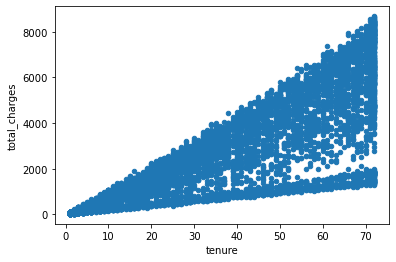

In [8]:
telco_churn_fix.plot.scatter(y='total_charges', x = 'tenure')

In [9]:
# Set Variables
x = telco_churn_fix.tenure
y = telco_churn_fix.total_charges
alpha = 0.05

In [10]:
r, p = stats.pearsonr(x, y)
print('r =', r)
print('p =', p)

r = 0.8258804609332071
p = 0.0


### What happens if you control for phone and internet service?

In [ ]:
sns.relplot(data=telco_churn_fix, y='total_charges', x='tenure', col='phone_service')

In [ ]:
sns.relplot(data=telco_churn_fix, y='total_charges', x='tenure', col='internet_service_type_id')

### Use the employees database. Is there a relationship between how long an employee has been with the company and their salary? Is there a relationship between how long an employee has been with the company and the number of titles they have had?

In [ ]:
from env import host, user, password

url = f'mysql+pymysql://{user}:{password}@{host}/employees'

In [ ]:
sql = '''
SELECT
    *
FROM salaries
WHERE salaries.to_date = '9999-01-01'
'''

salaries = pd.read_sql(sql, url)
salaries.head()

In [ ]:
# State Hypotheses
#H_0: There is no linear relationship between hire date and salary.
#H_a: There is a linear relationship between hire date and salary.

In [ ]:
#Visualize Data
salaries.from_date.hist()
#salaries.salary.hist()

In [ ]:
#Convert from object into date time
salaries["from_date"]= pd.to_datetime(salaries["from_date"])
salaries.from_date = pd.to_numeric(salaries.from_date)

In [ ]:
salaries.head()

In [ ]:
# Prepare variables
x = salaries.from_date
y = salaries.salary
alpha = .05

In [ ]:
r, p = stats.pearsonr(x, y)
print('r =', r)
print('p =', p)

In [ ]:
#Conclusion
# there appears to be no correlation between hire date and salary

### Is there a relationship between how long an employee has been with the company and the number of titles they have had?

In [ ]:
sql = '''
SELECT
    *
FROM titles t 
'''

titles = pd.read_sql(sql, url)
titles.head()

In [ ]:
#Convert from object into date time
titles["from_date"]= pd.to_datetime(titles["from_date"])
titles.from_date = pd.to_numeric(titles.from_date)

In [ ]:
# State Hypotheses
#H_0: There is no linear relationship between hire date and number of titles.
#H_a: There is a linear relationship between hire date and number of titles.

In [ ]:
#what are our variable types
titles.dtypes

In [ ]:
#Create new column with number of titles
# Create the new column based on an existing column.

# Using groupby() and count()
#title_count = titles.groupby(['emp_no'])['emp_no'].count()
#title_count

#Remove duplicate emp_no from data
#emp_no_unique = titles.emp_no.unique()
#
#Create dataframe with new data
#title_count.dtype

In [ ]:
#Turn emp_no_unique into a series
#emp_no_unique = pd.Series(emp_no_unique) 
#emp_no_unique
title_count = pd.DataFrame(title_count)
title_count.columns = ['emp_no', 'total_titles']

In [ ]:
#Visualize the data
#titles.from_date.hist()
titles.title.hist()

In [ ]:
# Prepare variables
x = titles.title
y = titles.from_date
alpha = .05

In [ ]:
r, p = stats.pearsonr(x, y)
print('r =', r)
print('p =', p)

In [12]:
from pydataset import data
sleepstudy = data('sleepstudy')
sleepstudy.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


### Is there a relationship between days and reaction time?

In [13]:
# State Hypotheses
#H_0: There is no linear relationship between days and reaction time
#H_a: There is a linear relationship between days and reaction time

In [14]:
sleepstudy.Days

1      0
2      1
3      2
4      3
5      4
      ..
176    5
177    6
178    7
179    8
180    9
Name: Days, Length: 180, dtype: int64

<AxesSubplot:>

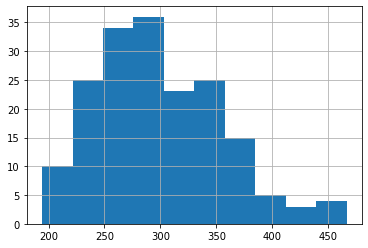

In [17]:
#Visualize Data
#sleepstudy.Days.hist()
sleepstudy.Reaction.hist()

In [18]:
# Prepare variables
x = sleepstudy.Days
y = sleepstudy.Reaction
alpha = .05

In [19]:
r, p = stats.pearsonr(x, y)
print('r =', r)
print('p =', p)

r = 0.5352302262650255
p = 9.89409632221439e-15


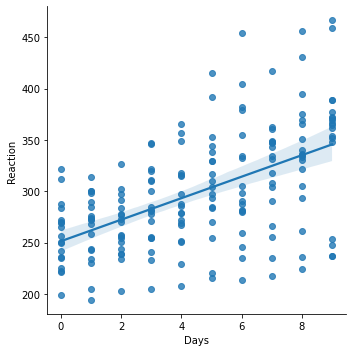

In [20]:
#Conclusion
#There is a moderately strong positive correlation between days and reaction time.
sns.lmplot(data=sleepstudy, y='Reaction', x='Days')

## Chi-Square testing

#### 1.  Answer with the type of stats test you would use (assume normal distribution):

- Do students get better test grades if they have a rubber duck on their desk?
     - T-test
- Does smoking affect when or not someone has lung cancer?
    - Chi-squared
- Is gender independent of a person’s blood type?
    - Chi-squared
- A farming company wants to know if a new fertilizer has improved crop yield or not?
    - T-Test
- Does the length of time of the lecture correlate with a students grade?
    - Pearson's R
- Do people with dogs live in apartments more than people with cats?
    - Chi-Squared

#### 2. Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.

 	Codeup Student	Not Codeup Student
Uses a Macbook	49	20
Doesn't Use A Macbook	1	30

In [ ]:
#Create dataframe with data
macbook = pd.DataFrame({'Codeup_Student': [49, 1], 'Not_Codeup_Student' : [20, 30]}, index=['Uses_Mac', 'No_Mac'])
macbook

Form hypotheses:
#H_0: Using a macbook and being a codeup student are independent of each other
#H_a: Using a macbook and being a codeup student are dependent on each other

In [ ]:
#Compute test statistic
chi2, p, degf, expected = stats.chi2_contingency(macbook)
chi2, p, degf, expected

In [ ]:
#Conclusion
if p < 0.05:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

#### 3. Choose another 2 categorical variables from the mpg dataset and perform a chi2 contingency table test with them. Be sure to state your null and alternative hypotheses.

In [ ]:
mpg = data('mpg')
#data('mpg', show_doc = True)

Form hypotheses:

#H_0: Vehicle drive is independent from vehicle transmission type

#H_a: Vehicle drive is dependent on vehicle transmission type

In [ ]:
#Find categorical variables
mpg.nunique()
#Year, drive, fuel, cylinder, class

In [ ]:
#Choosing drive(front, 4wd, rwd)
mpg.drv.value_counts()

In [ ]:
#Choosing transmission
mpg['trans'] = np.where(mpg.trans.str.contains('auto'), 'auto', 'manual')
mpg.head()

In [ ]:
mpg_observed = pd.crosstab(mpg.trans, mpg.drv)
mpg_observed

In [ ]:
# Compute test statistic
chi2, p, df, mpg_expected = stats.chi2_contingency(mpg_observed)
chi2, p, df, mpg_expected

In [ ]:
#Conclusion
if p < 0.05:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

#### 4. Use the data from the employees database to answer these questions:



In [ ]:
#### Is an employee's gender independent of whether an employee works in sales
## or marketing? (only look at current employees)

In [ ]:
# read from the SQL database
from env import host, user, password
url = f'mysql+pymysql://{user}:{password}@{host}/employees'

In [ ]:
sql = '''
SELECT e.emp_no, e.gender, d.dept_name, dm.dept_no
FROM employees e
JOIN dept_emp de USING(emp_no)
JOIN departments d USING(dept_no)
LEFT JOIN dept_manager dm USING(emp_no)
WHERE de.to_date > NOW()
'''

In [ ]:
employees = pd.read_sql(sql, url)
employees.head()

In [ ]:
#Form hypotheses:

#H_0: Employee gender is independent from employee department

#H_a: Employee gender is dependent on employee department

In [ ]:
#Take Sales and Marketing from employees table
emp_departments = employees[(employees.dept_name == 'Sales') | (employees.dept_name == 'Marketing')]
emp_departments.head()

In [ ]:
#Make Crosstab
emp_observed = pd.crosstab(employees.gender, emp_departments.dept_name)
emp_observed

In [ ]:
# Compute test statistic
chi2, p, df, emp_expected = stats.chi2_contingency(emp_observed)
chi2, p, df, emp_expected

In [ ]:
#Conclusion
if p < 0.05:
    print('Reject the null hypothesis: There is a relationship between employee gender and department')
else:
    print('Fail to reject the null hypothesis: there appears to be no relationship between employee gender and whether or not they work in marketing or sales')

#### Is an employee's gender independent of whether or not they are or have been a manager?

In [ ]:
#Form hypotheses:

#H_0: Employee gender is independent from whether or not they have been a manager

#H_a: There is an association between gender and whether a person has been a manager

In [ ]:
employees.dept_no.head()

In [ ]:
employees['was_manager'] = np.where(employees.dept_no.isnull(), False, True)
employees.head()

In [ ]:
len(employees[employees.was_manager == True])

In [ ]:
#Make Crosstab
manager_observed = pd.crosstab(employees.gender, employees.was_manager)
manager_observed

In [ ]:
# Compute test statistic
chi2, p, df, manager_expected = stats.chi2_contingency(manager_observed)
chi2, p, df, manager_expected

In [ ]:
#Conclusion
if p < 0.05:
    print('Reject the null hypothesis: There is a relationship between employee gender and management position')
else:
    print('Fail to reject the null hypothesis: there appears to be no relationship between employee gender and management position')